In [ ]:
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

--2022-01-05 13:40:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  31.7MB/s    in 1.8s    

2022-01-05 13:40:30 (31.7 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [ ]:
!cd /content


In [ ]:
!ls 

 sample_data  'UCI HAR Dataset.zip'


In [ ]:
!unzip 'UCI HAR Dataset.zip'

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [ ]:
!unzip UCI HAR Dataset.zip

unzip:  cannot find or open UCI, UCI.zip or UCI.ZIP.


In [ ]:
!cd /content/'UCI HAR Dataset'/

In [ ]:
!ls

In [ ]:
!cd /content/UCI/

/bin/bash: line 0: cd: /content/UCI/: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!cd /content/UCI

In [ ]:
!cd /content/UCI/

/bin/bash: line 0: cd: /content/UCI/: No such file or directory


In [ ]:
!pwd

/content


/content/UCI/train/Inertial Signals/total_acc_x_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/total_acc_y_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/total_acc_z_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/body_acc_x_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/body_acc_y_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/body_acc_z_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/body_gyro_x_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/body_gyro_y_train.txt
(7352, 128)
/content/UCI/train/Inertial Signals/body_gyro_z_train.txt
(7352, 128)
/content/UCI/train/y_train.txt
(7352, 1)
(7352, 128, 9) (7352, 1)
/content/UCI/test/Inertial Signals/total_acc_x_test.txt
(2947, 128)
/content/UCI/test/Inertial Signals/total_acc_y_test.txt
(2947, 128)
/content/UCI/test/Inertial Signals/total_acc_z_test.txt
(2947, 128)
/content/UCI/test/Inertial Signals/body_acc_x_test.txt
(2947, 128)
/content/UCI/test/Inertial Signals/b

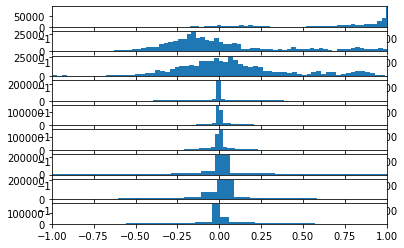

In [ ]:
# plot distributions
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
  print(filepath);
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
  print(dataframe.shape)
  return dataframe.values
 
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
  loaded = list()
  for name in filenames:
    data = load_file(prefix + name)
    loaded.append(data)
  # stack group so that features are the 3rd dimension
  loaded = dstack(loaded)
  return loaded
 
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + '/content/UCI/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + '/content/UCI/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	print("beforrrrrreeeeeee",trainy)
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy
 
# plot a histogram of each variable in the dataset
def plot_variable_distributions(trainX):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	print(longX.shape)
	pyplot.figure()
	xaxis = None
	for i in range(longX.shape[1]):
		ax = pyplot.subplot(longX.shape[1], 1, i+1, sharex=xaxis)
		ax.set_xlim(-1, 1)
		if i == 0:
			xaxis = ax
		pyplot.hist(longX[:, i], bins=100)
	pyplot.show()
 
# load data
trainX, trainy, testX, testy = load_dataset()
# plot histograms
plot_variable_distributions(trainX)

In [ ]:
import pandas as pd
 
pd.DataFrame(trainy)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
7347,0.0,1.0,0.0,0.0,0.0,0.0
7348,0.0,1.0,0.0,0.0,0.0,0.0
7349,0.0,1.0,0.0,0.0,0.0,0.0
7350,0.0,1.0,0.0,0.0,0.0,0.0
